In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [7]:
test=pd.read_csv('test_data.csv')
df =pd.read_csv('train_data.csv')
df.head(2)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0


In [8]:
df.corr()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
YearOfObservation,1.000000,0.025434,-0.040391,0.009128,0.005490,-0.029492,-0.016367
Insured_Period,0.025434,1.000000,-0.037620,0.007473,-0.017811,-0.003445,0.088715
Residential,-0.040391,-0.037620,1.000000,0.057481,0.334039,-0.042058,0.063509
Building Dimension,0.009128,0.007473,0.057481,1.000000,0.007935,0.207624,0.297089
Building_Type,0.005490,-0.017811,0.334039,0.007935,1.000000,-0.146608,0.112168
Date_of_Occupancy,-0.029492,-0.003445,-0.042058,0.207624,-0.146608,1.000000,0.019170
Claim,-0.016367,0.088715,0.063509,0.297089,0.112168,0.019170,1.000000


In [9]:
pd.read_csv('VariableDescription.csv')

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [10]:
eda_df=df.copy()
df.shape

(7160, 14)

In [11]:
eda_df['zero']=1-eda_df.Claim
eda_df['one']=eda_df.Claim
eda_df.head(2)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,zero,one
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0,1,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0,1,0


In [12]:
a=pd.factorize(df.Building_Fenced)[0]
c=pd.factorize(df.Garden)[0]
b=pd.factorize(df.Settlement)[0]
print(np.mean(a==b))
print(np.mean(a==c))

0.9997206703910615
0.9988826815642458


Thus `Building_Fenced`,`Garden`,`Settlement` conatin same value.<br>
so we drop any two columns

In [15]:
df.drop(columns=['Garden','Settlement'],inplace=True)

In [16]:
df.Building_Fenced=pd.factorize(df.Building_Fenced)[0]
df.Building_Painted=pd.factorize(df.Building_Painted)[0]


In [17]:
df.head(2)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,0,0,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,1,1,490.0,1,1850.0,4,1053,0


In [18]:
df['Building Dimension'].fillna(df.groupby(['Building_Painted','Building_Fenced'])['Building Dimension'].transform('mean'),inplace=True)


In [19]:
df.Date_of_Occupancy.fillna(method='ffill',inplace=True)

In [20]:
df.NumberOfWindows.replace('   .',np.nan,inplace=True)
df.NumberOfWindows.replace('>=10',10,inplace=True)
df.NumberOfWindows.fillna(method='ffill',inplace=True)
df.NumberOfWindows.fillna(method='bfill',inplace=True)

In [21]:
df['diff']=df.YearOfObservation-df.Date_of_Occupancy

In [22]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,diff
0,H14663,2013,1.0,0,0,0,290.0,1,1960.0,4,1053,0,53.0
1,H2037,2015,1.0,0,1,1,490.0,1,1850.0,4,1053,0,165.0
2,H3802,2014,1.0,0,0,0,595.0,1,1960.0,4,1053,0,54.0
3,H3834,2013,1.0,0,1,0,2840.0,1,1960.0,4,1053,0,53.0
4,H5053,2014,1.0,0,1,1,680.0,1,1800.0,3,1053,0,214.0


In [23]:
test=pd.read_csv('test_data.csv')

In [24]:
test.drop(columns=['Garden','Settlement'],inplace=True)
test.Building_Fenced=pd.factorize(test.Building_Fenced)[0]
test.Building_Painted=pd.factorize(test.Building_Painted)[0]
test['Building Dimension'].fillna(test.groupby(['Building_Painted','Building_Fenced'])['Building Dimension'].transform('mean'),inplace=True)
test.Date_of_Occupancy.fillna(method='ffill',inplace=True)
test.NumberOfWindows.replace('   .',np.nan,inplace=True)
test.NumberOfWindows.replace('>=10',10,inplace=True)
test.NumberOfWindows.fillna(method='ffill',inplace=True)
test.NumberOfWindows.fillna(method='bfill',inplace=True)
test['diff']=test.YearOfObservation-test.Date_of_Occupancy

In [25]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,diff
0,H11920,2013,1.000000,0,0,0,300.0,1,1960.0,3,3310,53.0
1,H11921,2016,0.997268,0,0,0,300.0,1,1960.0,3,3310,56.0
2,H9805,2013,0.369863,0,0,1,790.0,1,1960.0,3,3310,53.0
3,H7493,2014,1.000000,0,0,0,1405.0,1,2004.0,3,3321,10.0
4,H7494,2016,1.000000,0,0,0,1405.0,1,2004.0,3,3321,12.0


In [26]:
test.NumberOfWindows=test.NumberOfWindows.astype(int)
df.NumberOfWindows=df.NumberOfWindows.astype(int)

In [27]:
all_data=pd.concat([df,test])
all_data.reset_index(drop=True,inplace=True)

In [21]:
all_data.Geo_Code.fillna(-1,inplace=True)

In [22]:
all_data['Geo_Code']=all_data['Geo_Code'].astype(str)

In [23]:
i='Geo_Code'
le=LabelEncoder()
le.fit(all_data[i])
all_data[i]=le.transform(all_data[i])

In [24]:
all_data.isna().sum()

Building Dimension       0
Building_Fenced          0
Building_Painted         0
Building_Type            0
Claim                 3069
Customer Id              0
Date_of_Occupancy        0
Geo_Code                 0
Insured_Period           0
NumberOfWindows          0
Residential              0
YearOfObservation        0
diff                     0
dtype: int64

In [25]:
train_en=all_data.loc[:7159]
test_en=all_data.loc[7160:]
train_en.to_csv('train_en.csv',index=False)
test_en.to_csv('test_en.csv',index=False)

### onehot

In [489]:
all_data=pd.get_dummies(df.Building_Fenced,prefix='Building_Fenced')

In [507]:
Building_Fenced=pd.get_dummies(df.Building_Fenced,prefix='Building_Fenced')
all_data[['Building_Fenced_0','Building_Fenced_1']]=Building_Fenced
all_data.drop(columns=['Building_Fenced'],inplace=True)

In [509]:
Building_Painted=pd.get_dummies(df.Building_Painted,prefix='Building_Painted')
all_data[['Building_Painted_0','Building_Painted_1']]=Building_Fenced
all_data.drop(columns=['Building_Painted'],inplace=True)

In [511]:
all_data.head(2)

,Building Dimension,Building_Type,Claim,Customer Id,Date_of_Occupancy,Geo_Code,Insured_Period,NumberOfWindows,Residential,YearOfObservation,diff,Building_Fenced_0,Building_Fenced_1,Building_Painted_0,Building_Painted_1
0,290.0,1,0.0,H14663,1960.0,8,1.0,4,0,2013,53.0,1.0,0.0,1.0,0.0
1,490.0,1,0.0,H2037,1850.0,8,1.0,4,0,2015,165.0,0.0,1.0,0.0,1.0


In [512]:
train_en=all_data.loc[:7159]
test_en=all_data.loc[7160:]
train_en.to_csv('train_one.csv',index=False)
test_en.to_csv('test_one.csv',index=False)

### mean

In [26]:
all_data.head()

,Building Dimension,Building_Fenced,Building_Painted,Building_Type,Claim,Customer Id,Date_of_Occupancy,Geo_Code,Insured_Period,NumberOfWindows,Residential,YearOfObservation,diff
0,290.0,0,0,1,0.0,H14663,1960.0,8,1.0,4,0,2013,53.0
1,490.0,1,1,1,0.0,H2037,1850.0,8,1.0,4,0,2015,165.0
2,595.0,0,0,1,0.0,H3802,1960.0,8,1.0,4,0,2014,54.0
3,2840.0,0,1,1,0.0,H3834,1960.0,8,1.0,4,0,2013,53.0
4,680.0,1,1,1,0.0,H5053,1800.0,8,1.0,3,0,2014,214.0


In [27]:
means = all_data.groupby('Building_Fenced')['Claim'].mean()
all_data['Building_Fenced']=all_data['Building_Fenced'].map(means)
means = all_data.groupby('Building_Type')['Claim'].mean()
all_data['Building_Type']=all_data['Building_Type'].map(means)

means = all_data.groupby('Residential')['Claim'].mean()
all_data['Residential']=all_data['Residential'].map(means)

means = all_data.groupby('Building_Painted')['Claim'].mean()
all_data['Building_Painted']=all_data['Building_Painted'].map(means)

In [28]:
all_data.head(2)

,Building Dimension,Building_Fenced,Building_Painted,Building_Type,Claim,Customer Id,Date_of_Occupancy,Geo_Code,Insured_Period,NumberOfWindows,Residential,YearOfObservation,diff
0,290.0,0.206363,0.206412,0.177156,0.0,H14663,1960.0,8,1.0,4,0.210537,2013,53.0
1,490.0,0.249723,0.235414,0.177156,0.0,H2037,1850.0,8,1.0,4,0.210537,2015,165.0


In [33]:
train_mean=all_data.loc[:7159]
test_mean=all_data.loc[7160:]
train_mean.to_csv('train_mean.csv',index=False)
test_mean.to_csv('test_mean.csv',index=False)

In [36]:
pd.crosstab?

In [30]:
all_data.dtypes

Building Dimension    float64
Building_Fenced       float64
Building_Painted      float64
Building_Type         float64
Claim                 float64
Customer Id            object
Date_of_Occupancy     float64
Geo_Code                int32
Insured_Period        float64
NumberOfWindows         int32
Residential           float64
YearOfObservation       int64
diff                  float64
dtype: object

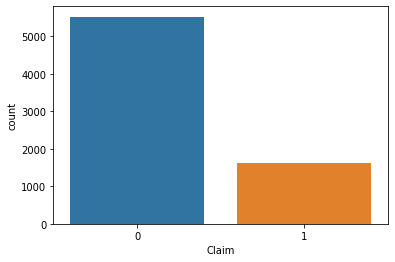

In [24]:
sns.countplot(df.Claim)

In [28]:
df['Garden'].fillna(df['Garden'].mode()[0],inplace=True)

In [29]:
df['Building Dimension'].fillna(df['Building Dimension'].mean(),inplace=True)

In [30]:
df['Date_of_Occupancy'].fillna(df['Date_of_Occupancy'].mode()[0],inplace=True)

In [31]:
df['Geo_Code'].fillna(df['Geo_Code'].mode()[0],inplace=True)

In [32]:
df.Garden.value_counts()

O    3609
V    3551
Name: Garden, dtype: int64

In [33]:
#Building_Painted        
#Building_Fenced 
df.Building_Fenced.value_counts()
z=df.groupby('Building_Fenced').Claim.value_counts()
z

Building_Fenced  Claim
N                0        2707
                 1         901
V                0        2819
                 1         733
Name: Claim, dtype: int64

In [34]:
df.Building_Painted.value_counts()
z=df.groupby('Building_Painted').Claim.value_counts()
z

Building_Painted  Claim
N                 0        1411
                  1         367
V                 0        4115
                  1        1267
Name: Claim, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder
ob=['Building_Painted','Building_Fenced','Settlement','Garden','Geo_Code','NumberOfWindows']
for i in ob:
    print(i)
    le=LabelEncoder().fit(df[i])
    df[i]=le.transform(df[i])

Building_Painted
Building_Fenced
Settlement
Garden
Geo_Code
NumberOfWindows


In [37]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,0,1,1,1,290.0,1,1960.0,0,7,0
1,H2037,2015,1.0,0,1,0,0,0,490.0,1,1850.0,4,7,0
2,H3802,2014,1.0,0,0,1,1,1,595.0,1,1960.0,0,7,0
3,H3834,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,0,7,0
4,H5053,2014,1.0,0,1,0,0,0,680.0,1,1800.0,3,7,0


In [38]:
df.drop(columns=['Customer Id'],inplace=True)

In [39]:
test=pd.read_csv('test_data.csv')

In [40]:
test.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [41]:
test['Garden'].fillna(test['Garden'].mode()[0],inplace=True)
test['Geo_Code'].fillna(test['Geo_Code'].mode()[0],inplace=True)
test['Date_of_Occupancy'].fillna(test['Date_of_Occupancy'].mode()[0],inplace=True)
test['Building Dimension'].fillna(test['Building Dimension'].mean(),inplace=True)

In [42]:
from sklearn.preprocessing import LabelEncoder
ob=['Building_Painted','Building_Fenced','Settlement','Garden','Geo_Code','NumberOfWindows']
for i in ob:
    print(i)
    le=LabelEncoder().fit(test[i])
    test[i]=le.transform(test[i])

Building_Painted
Building_Fenced
Settlement
Garden
Geo_Code
NumberOfWindows


In [43]:
z=test['Customer Id']
test.drop(columns=['Customer Id'],inplace=True)


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc

In [80]:
model=RandomForestClassifier()
model.fit(df.iloc[:,:-1],df['Claim'])
z['Claim']=model.predict(test)

C:\Users\ujjal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ujjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [111]:
test.drop(columns=['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code',],inplace=True)

In [112]:
test.to_csv('sub.csv',index=False)